In [112]:
#Importing the necessary libraries:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Our task is to predict the Performance Rating of the employees (based on these ‘features’’), which forms our target variable.

In [133]:
#Import the excel file
df = pd.read_excel('Hr_data.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [ ]:
['EmpNumber','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole',
 'BusinessTravelFrequency']

In [54]:
#Is there any Null/NaN Value?

df.isnull().values.any()

# No Null values.

False

I.Analysing employees with their Education background:

In [13]:
education_counts = df['EducationBackground'].value_counts()

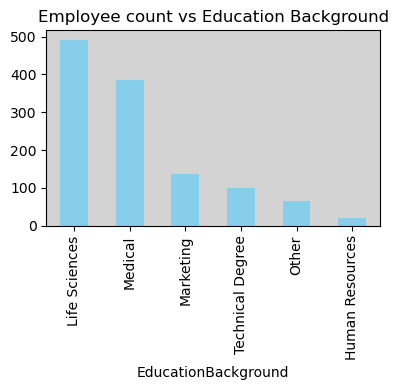

In [27]:
plt.figure(figsize=(4, 4)) 
education_counts.plot(kind='bar', color='skyblue')
plt.title('Employee count vs Education Background')
plt.tight_layout()
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion

1. Life Sciences education background of the greatest number of employees, followed by Medical.
2. Human Resources has the lowest number of employees in it.

II.Analysing employees with their Departments:

In [8]:
df['EmpDepartment'].value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

Conclusion:

It can thus be deduced that the Sales department has the largest number of workforce, and Data Science the lowest.

III.Analysing department-wise performance rating of the employees:

In [9]:
df.groupby('EmpDepartment').PerformanceRating.mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

Conclusion:

1.Performance ratings for employees in the Data Science department is highest.

2.Performance ratings for employees in the Sales department is the lowest.

IV.Analysing Employee Gender Distribution with Performance Rating:

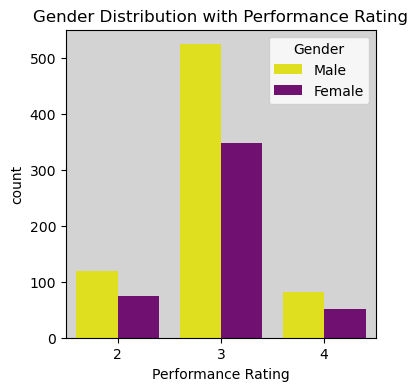

In [26]:
plt.figure(figsize=(4, 4))
custom_palette = {'Male': 'yellow', 'Female': 'purple'}
sns.countplot(data=df, x='PerformanceRating', hue='Gender',palette=custom_palette)
plt.title('Gender Distribution with Performance Rating')
plt.xlabel('Performance Rating')
plt.legend(title='Gender')
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion:

1.Most of the employees have Performance Rating Greater than 3.

2.In all the rating ranges,cout of male employees is higher than that of female.

So,it is deduced that men employees outperform women. It is also observed that the rating of 3 is the most common.

V.Employee Age Distribution:


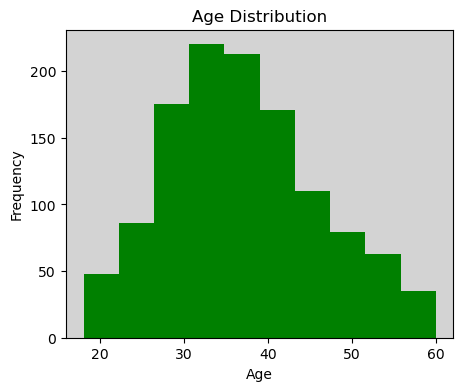

In [45]:
plt.figure(figsize=(5, 4))
age_distribution = df['Age'].plot.hist(color='green') 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion:

1.we see that a good many number of the employees are in the age group of 30–40.

2.There are very few people in the age group of 55–60.

3.Majority of the working class is therefore in their late 30’s.

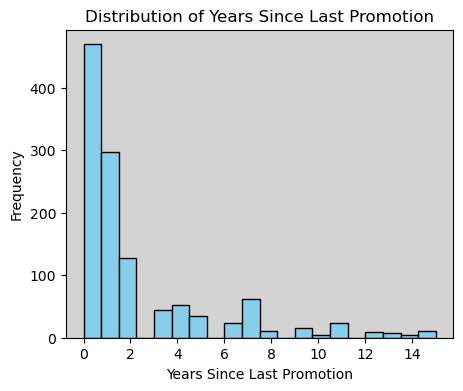

In [52]:
# Assuming df is your DataFrame containing the data
plt.figure(figsize=(5, 4))
plt.hist(df['YearsSinceLastPromotion'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')
plt.gca().set_facecolor('lightgrey')
plt.show()

Conclusion:

It is seen that a whole lot of employees were being promoted quite often i.e. in 0–1.5 years.

Regression or Classification?


In [56]:
df['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

Now,If we check the Performance Rating,which is out target variable,as we can see,it has three values,2,3 and 4,which implies that it is a classification problem as this column is a categorical column.

Change the Categorical Data,One Hot Encoding

In [180]:
new_df = df.copy()

# Assuming 'le' is your LabelEncoder instance
le = LabelEncoder()

# Assuming df is your DataFrame and you have multiple categorical columns
categorical_columns = ['EmpNumber','Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
                       'EmpJobRole','BusinessTravelFrequency','Attrition','OverTime']

# Apply label encoding to each categorical column
for col in categorical_columns:
    new_df[col] = le.fit_transform(new_df[col])

# Now your categorical columns are encoded with numerical values

Train the model:

In [182]:
#import
from sklearn.model_selection import train_test_split

In [183]:
#define x and y:
col=list(df)
x=new_df[col[1:27]]
y=new_df['PerformanceRating']

In [184]:
#We want to keep 20 % of the data as test size,so,0.2.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [185]:
len(x_train)

840

In [186]:
len(x_test)

360

In [187]:
y_test

116     3
800     2
1025    3
902     4
1028    3
       ..
734     2
1131    3
363     2
24      3
917     3
Name: PerformanceRating, Length: 360, dtype: int64

In [188]:
new_df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,1196,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,1197,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,1198,34,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3


In [189]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [190]:
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predictions:

In [191]:
model.predict(x_test)

array([3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 2, 3, 3, 3, 2, 2, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       2, 4, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 4, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 2, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3,
       3, 4, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

Check Accuracy of the Model:
    

In [192]:
model.score(x_test,y_test)

0.7638888888888888

Confusion Matrix to Better Visualize the Accuracy and Inaccuracy of the Model:

In [194]:
y_predicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 35,  30,   3],
       [ 18, 224,  11],
       [  0,  23,  16]], dtype=int64)

Text(33.22222222222222, 0.5, 'Truth')

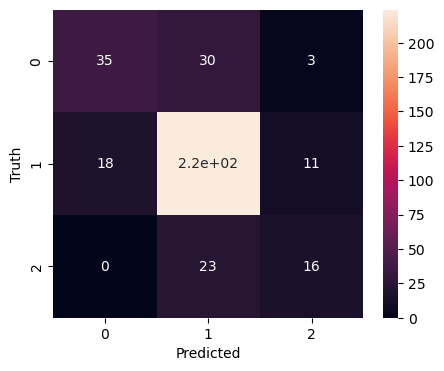

In [195]:
import seaborn as sn
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Recommendations:

After careful evaluation of the drawn observations, we can recommend the following to increase employee performance at an organization:

1.Ensure a more improved rate of salary raises for the employees

2.Create a more friendly, comfortable and inclusive office environment

3.Help upgrade the skill sets of the current employees, so as to make them suitable to take up more responsibilities and challenges, and in turn, prepare them for promotions